In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.neighbors import KernelDensity

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
normal_path = "/content/drive/MyDrive/IOT_Project/data/normal/"
fog_path = "/content/drive/MyDrive/IOT_Project/data/fog/"

## 1.前處理

### 1.1合併所有normal

In [21]:
def preprocess(folder_path):
    files = os.listdir(folder_path)
    result_df = pd.read_csv(f'{folder_path}{files[0]}', header=None)
    for file in files[1:]:
        df_temp = pd.read_csv(f'{folder_path}{file}', header=None)
        result_df = pd.concat([result_df, df_temp]) # 合併資料結內所有 dataframe

    return result_df

In [22]:
result_df = preprocess(normal_path)
print(result_df)
print(len(result_df))

        0      1      2      3      4     5     6     7    8     9    ...  \
0     144.0  146.0  141.0  144.0  124.0  80.0  39.0   0.0  0.0   0.0  ...   
1     144.0  146.0  141.0  144.0  124.0  80.0  39.0   0.0  0.0   0.0  ...   
2     144.0  146.0  141.0  144.0  124.0  80.0  39.0   0.0  0.0   0.0  ...   
3     144.0  146.0  141.0  144.0  124.0  80.0  39.0   0.0  0.0   0.0  ...   
4     144.0  146.0  141.0  144.0  124.0  80.0  39.0   0.0  0.0   0.0  ...   
...     ...    ...    ...    ...    ...   ...   ...   ...  ...   ...  ...   
1295    0.0   80.0  102.0  113.0  116.0  82.0  56.0  10.0  7.0  14.0  ...   
1296    0.0   80.0  102.0  113.0  116.0  82.0  56.0  10.0  7.0  14.0  ...   
1297    0.0   80.0  102.0  113.0  116.0  82.0  56.0  10.0  7.0  14.0  ...   
1298    0.0   80.0  102.0  113.0  116.0  82.0  56.0  10.0  7.0  14.0  ...   
1299    0.0   80.0  102.0  113.0  116.0  82.0  56.0  10.0  7.0  14.0  ...   

        168   169  170  171   172   173   174   175   176  177  
0       0.

In [23]:
result_df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,89.0,62.0,0.0,1.0,0.0,0.0
1,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,89.0,62.0,0.0,1.0,0.0,0.0
2,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,89.0,62.0,0.0,1.0,0.0,0.0
3,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,89.0,62.0,0.0,1.0,0.0,0.0
4,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,89.0,53.0,0.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,114.0,71.0,0.0,0.0,49.0,61.0,96.0,64.0,31.0,0.0
1296,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,107.0,67.0,0.0,0.0,49.0,61.0,96.0,64.0,31.0,0.0
1297,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,107.0,67.0,0.0,0.0,39.0,52.0,89.0,64.0,31.0,0.0
1298,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,107.0,67.0,0.0,0.0,39.0,52.0,89.0,57.0,32.0,0.0


In [24]:
# 要插入全為0的新欄位
rows = len(result_df)
new_column = pd.Series([0 for i in range(rows)])
# 新欄位索引
insert_list = [20, 40, 60, 61, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 117, 118, 119, 120,
         140, 160, 180, 181, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230] # 237, 238, 239, 240]

# print(len(insert_list))
for i in range(len(insert_list)):
  result_df.insert(loc=insert_list[i], column=f'{insert_list[i]}', value=new_column)

# result_df['237']=0

result_df['237'] = 0
result_df['238'] = 0
result_df['239'] = 0
result_df['240'] = 0

result_df

,0,1,2,3,4,5,6,7,8,9,...,230,173,174,175,176,177,237,238,239,240
0,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
1,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
2,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
3,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
4,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,53.0,0.0,11.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,61.0,96.0,64.0,31.0,0.0,0,0,0,0
1296,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,61.0,96.0,64.0,31.0,0.0,0,0,0,0
1297,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,52.0,89.0,64.0,31.0,0.0,0,0,0,0
1298,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,52.0,89.0,57.0,32.0,0.0,0,0,0,0


In [25]:
# 把240個欄位名稱依序改成改成0~240
result_df.columns = range(240)
result_df

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
1,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
2,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
3,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,62.0,0.0,1.0,0.0,0.0,0,0,0,0
4,144.0,146.0,141.0,144.0,124.0,80.0,39.0,0.0,0.0,0.0,...,0,53.0,0.0,11.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,61.0,96.0,64.0,31.0,0.0,0,0,0,0
1296,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,61.0,96.0,64.0,31.0,0.0,0,0,0,0
1297,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,52.0,89.0,64.0,31.0,0.0,0,0,0,0
1298,0.0,80.0,102.0,113.0,116.0,82.0,56.0,10.0,7.0,14.0,...,0,52.0,89.0,57.0,32.0,0.0,0,0,0,0


In [26]:
# insert_list = [20, 40, 60, 61, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 117, 118, 119, 120,
#          140, 160, 180, 181, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 237, 238, 239, 240]

# print(len(insert_list))

In [27]:
total = len(result_df)
combined_list = []
for i in range(total):
  row = result_df.iloc[i].tolist()
  combined_list.append(row)

print(len(combined_list))
print(combined_list[:10])


35350
[[144.0, 146.0, 141.0, 144.0, 124.0, 80.0, 39.0, 0.0, 0.0, 0.0, 12.0, 0.0, 33.0, 11.0, 5.0, 116.0, 99.0, 4.0, 66.0, 142.0, 0.0, 144.0, 142.0, 143.0, 132.0, 116.0, 63.0, 35.0, 0.0, 2.0, 36.0, 78.0, 101.0, 96.0, 59.0, 71.0, 78.0, 1.0, 0.0, 129.0, 0.0, 136.0, 134.0, 130.0, 115.0, 96.0, 93.0, 83.0, 81.0, 22.0, 58.0, 87.0, 100.0, 108.0, 37.0, 10.0, 67.0, 0.0, 0.0, 61.0, 0.0, 0.0, 88.0, 55.0, 45.0, 37.0, 73.0, 110.0, 102.0, 91.0, 102.0, 117.0, 126.0, 118.0, 61.0, 15.0, 17.0, 0.0, 83.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 112.0, 108.0, 118.0, 118.0, 106.0, 19.0, 66.0, 0.0, 97.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 90.0, 90.0, 51.0, 99.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.

In [28]:
combined_array = np.array(combined_list)
print(combined_array.shape)

(35350, 240)


### 轉成圖像形式

In [29]:
combined_array = combined_array.reshape(35350, 12, 20)
print(combined_array.shape)

(35350, 12, 20)


In [30]:
print(combined_array[0])
print(combined_array[0].shape)

[[144. 146. 141. 144. 124.  80.  39.   0.   0.   0.  12.   0.  33.  11.
    5. 116.  99.   4.  66. 142.]
 [  0. 144. 142. 143. 132. 116.  63.  35.   0.   2.  36.  78. 101.  96.
   59.  71.  78.   1.   0. 129.]
 [  0. 136. 134. 130. 115.  96.  93.  83.  81.  22.  58.  87. 100. 108.
   37.  10.  67.   0.   0.  61.]
 [  0.   0.  88.  55.  45.  37.  73. 110. 102.  91. 102. 117. 126. 118.
   61.  15.  17.   0.  83.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 112. 108. 118. 118. 106.
   19.  66.   0.  97.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  90.  90.  51.
   99.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   2.]
 [  0.   2.   0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    9.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   3.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   4.   7.   0.  29

## 2.模型調適


In [31]:

# 将数据转换为适当的形状 (35350, 12, 20, 1)，添加通道维度
samples = combined_array.reshape(35350, 12, 20, 1)/255

# 构建卷积自编码器
model = models.Sequential()

# 编码器部分
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(12, 20, 1)))
# model.add(layers.MaxPooling2D((2, 2), padding='same'))
# model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2), padding='same'))

# 解码器部分
# model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
# model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
# model.add(layers.UpSampling2D((2, 2)))

# 输出层
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

learning_rate = 0.0001  # You can adjust this value
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# 训练模型
model.fit(samples, samples, epochs=50, batch_size=1000, shuffle=True)

# 使用训练好的模型进行预测
decoded_samples = model.predict(samples)

# 计算重构误差
mse = tf.keras.losses.MeanSquaredError()
reconstruction_error = mse(samples, decoded_samples).numpy()
print(f"Reconstruction Error: {reconstruction_error}")

# 可以使用 reconstruction_error 进行异常检测，设置一个阈值来判断何时认为是异常


Epoch 1/50
36/36 [==============================] - 14s 355ms/step - loss: 0.1856 - mse: 0.1856
Epoch 2/50
36/36 [==============================] - 11s 310ms/step - loss: 0.1796 - mse: 0.1796
Epoch 3/50
36/36 [==============================] - 14s 382ms/step - loss: 0.1704 - mse: 0.1704
Epoch 4/50
36/36 [==============================] - 13s 372ms/step - loss: 0.1566 - mse: 0.1566
Epoch 5/50
36/36 [==============================] - 14s 398ms/step - loss: 0.1381 - mse: 0.1381
Epoch 6/50
36/36 [==============================] - 13s 373ms/step - loss: 0.1162 - mse: 0.1162
Epoch 7/50
36/36 [==============================] - 11s 317ms/step - loss: 0.0941 - mse: 0.0941
Epoch 8/50
36/36 [==============================] - 13s 351ms/step - loss: 0.0756 - mse: 0.0756
Epoch 9/50
36/36 [==============================] - 13s 373ms/step - loss: 0.0620 - mse: 0.0620
Epoch 10/50
36/36 [==============================] - 13s 369ms/step - loss: 0.0524 - mse: 0.0524
Epoch 11/50
36/36 [====================

In [32]:
# 假设你有一个单独的样本，形状为 (12, 20)
# single_sample = np.random.rand(12, 20)  # 你应该替换这行代码，使用你的实际数据
single_sample = combined_array[0]/255

# 将样本转换为适当的形状 (1, 12, 20, 1)，添加通道维度
single_sample = single_sample.reshape(1, 12, 20, 1)

# 使用训练好的模型进行预测
decoded_single_sample = model.predict(single_sample)

# 计算重构误差
reconstruction_error_single_sample = mse(single_sample, decoded_single_sample).numpy()
print(f"Reconstruction Error for Single Sample: {reconstruction_error_single_sample}")

1/1 [==============================] - 0s 22ms/step
Reconstruction Error for Single Sample: 0.0054052663035690784


In [42]:
# 假设你有一个单独的样本，形状为 (12, 20)
# single_sample = np.random.rand(12, 20)  # 你应该替换这行代码，使用你的实际数据
single_sample = combined_array[0]/255

# 将样本转换为适当的形状 (1, 12, 20, 1)，添加通道维度
single_sample = single_sample.reshape(1, 12, 20, 1)

# 使用训练好的模型进行预测
decoded_single_sample = model.predict(single_sample)

abs_diff = np.abs(single_sample - decoded_single_sample)


# 计算重构误差
print("絕對值差異：")
print(abs_diff)
print(abs_diff.shape)
print(np.mean(abs_diff))

1/1 [==============================] - 0s 25ms/step
絕對值差異：
[[[[0.17285714]
   [0.03602747]
   [0.0059453 ]
   [0.0165644 ]
   [0.00372222]
   [0.05891983]
   [0.07467276]
   [0.1255901 ]
   [0.09185968]
   [0.09677391]
   [0.11549528]
   [0.22995254]
   [0.18372657]
   [0.26433244]
   [0.23376697]
   [0.08491927]
   [0.04549926]
   [0.1739746 ]
   [0.03131661]
   [0.03443697]]

  [[0.20597078]
   [0.00810525]
   [0.08086857]
   [0.1044974 ]
   [0.10617706]
   [0.06101498]
   [0.0420614 ]
   [0.01620882]
   [0.05957979]
   [0.04297977]
   [0.02487735]
   [0.02974506]
   [0.0145081 ]
   [0.00560411]
   [0.0070959 ]
   [0.03927064]
   [0.07357116]
   [0.0721778 ]
   [0.09565927]
   [0.03817445]]

  [[0.13145643]
   [0.13733486]
   [0.01487955]
   [0.07389602]
   [0.07281444]
   [0.09363509]
   [0.08214552]
   [0.05876959]
   [0.0585775 ]
   [0.05677051]
   [0.01678069]
   [0.03890602]
   [0.08954412]
   [0.04459483]
   [0.07177725]
   [0.08025925]
   [0.13058697]
   [0.04889874]
   [0.080

In [34]:
total = combined_array.shape[0]

reconstruction_normal_list = []
for i in range(600):
  single_sample = combined_array[i]/255
  single_sample = single_sample.reshape(1, 12, 20, 1)
  decoded_single_sample = model.predict(single_sample)
  # reconstruction_error_single_sample = mse(single_sample, decoded_single_sample).numpy()
  reconstruction_error_single_sample = np.mean(np.square(single_sample - decoded_single_sample))
  reconstruction_normal_list.append(reconstruction_error_single_sample * 1000)

print(reconstruction_normal_list[:60])

1/1 [==============================] - 0s 22ms/step
[5.405266041440778, 5.416629257543734, 5.6882615816530695, 6.076054389109917, 6.11563079162629, 7.551768049555614, 8.086221644218005, 8.187757559078703, 7.808014523271804, 7.827684827765701, 7.727056667382907, 7.701495223548923, 7.425485489790146, 7.413268298060365, 7.666061433619591, 7.594804522577571, 7.720211813726982, 7.930192992999889, 7.961238236403238, 7.818100590266457, 7.855046959570418, 7.788201185787312, 8.027389473168588, 8.191591291138948, 8.170580423358354, 8.134249397190871, 8.169019083815694, 8.351185804503006, 8.368468953673439, 8.437134638040561, 8.429294141704432, 8.401087531902421, 8.473126869736827, 8.518842295136157, 8.547761681341113, 8.50935161437097, 8.618702754041285, 8.659349733690664, 8.692197723873436, 8.78086157458064, 8.821389386991067, 8.83057182784345, 8.79883012765407, 8.915149211844627, 8.93154631613207, 8.90717473844404, 8.95693389677561, 8.977113164177913, 8.965196143834342, 8.99822504337276, 2.734

## 3.異常檢測

In [35]:
# 讀取異常數據
result_df = preprocess(fog_path)

# 要插入全為0的新欄位
rows = len(result_df)
new_column = pd.Series([0 for i in range(rows)])
# 新欄位索引
insert_list = [20, 40, 60, 61, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 117, 118, 119, 120,
         140, 160, 180, 181, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230] # 237, 238, 239, 240]

# print(len(insert_list))
for i in range(len(insert_list)):
  result_df.insert(loc=insert_list[i], column=f'{insert_list[i]}', value=new_column)

# result_df['237']=0

result_df['237'] = 0
result_df['238'] = 0
result_df['239'] = 0
result_df['240'] = 0

# 把240個欄位名稱依序改成改成0~240
result_df.columns = range(240)
result_df


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,120.0,132.0,129.0,135.0,125.0,97.0,64.0,0.0,0.0,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,116.0,129.0,126.0,133.0,124.0,96.0,65.0,0.0,0.0,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,116.0,129.0,126.0,133.0,124.0,96.0,65.0,0.0,0.0,5.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,116.0,129.0,126.0,133.0,124.0,96.0,65.0,0.0,0.0,5.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,116.0,129.0,126.0,133.0,124.0,96.0,65.0,0.0,0.0,5.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,106.0,121.0,124.0,122.0,82.0,31.0,0.0,0.0,0.0,...,0,65.0,124.0,123.0,14.0,0.0,0,0,0,0
1596,0.0,106.0,121.0,124.0,122.0,82.0,31.0,0.0,0.0,0.0,...,0,65.0,124.0,123.0,14.0,0.0,0,0,0,0
1597,0.0,106.0,121.0,124.0,122.0,82.0,31.0,0.0,0.0,0.0,...,0,65.0,124.0,123.0,14.0,0.0,0,0,0,0
1598,0.0,106.0,121.0,124.0,122.0,82.0,31.0,0.0,0.0,0.0,...,0,53.0,107.0,96.0,31.0,0.0,0,0,0,0


In [36]:
total = len(result_df)
combined_list = []
for i in range(total):
  row = result_df.iloc[i].tolist()
  combined_list.append(row)

print(len(combined_list))
print(combined_list[:10])

combined_fog_array = np.array(combined_list)
print(combined_fog_array.shape)

combined_fog_array = combined_fog_array.reshape(combined_fog_array.shape[0], 12, 20)
print(combined_fog_array.shape)

print(combined_fog_array[0])
print(combined_fog_array[0].shape)

37300
[[120.0, 132.0, 129.0, 135.0, 125.0, 97.0, 64.0, 0.0, 0.0, 4.0, 21.0, 4.0, 80.0, 48.0, 28.0, 122.0, 114.0, 9.0, 5.0, 112.0, 0.0, 124.0, 130.0, 135.0, 126.0, 115.0, 76.0, 55.0, 18.0, 8.0, 41.0, 92.0, 121.0, 119.0, 78.0, 96.0, 83.0, 56.0, 0.0, 29.0, 0.0, 90.0, 111.0, 108.0, 104.0, 90.0, 99.0, 102.0, 89.0, 36.0, 64.0, 97.0, 118.0, 124.0, 61.0, 19.0, 86.0, 53.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 11.0, 57.0, 119.0, 117.0, 112.0, 119.0, 134.0, 138.0, 133.0, 87.0, 23.0, 52.0, 0.0, 94.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 125.0, 125.0, 131.0, 132.0, 119.0, 28.0, 89.0, 0.0, 117.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 113.0, 101.0, 71.0, 114.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 3.0, 0.0, 4.0, 4.0, 2.0, 12.0, 13.0, 13.0, 7.0, 0.0,

In [47]:
single_sample = combined_fog_array[555]/255

# 将样本转换为适当的形状 (1, 12, 20, 1)，添加通道维度
single_sample = single_sample.reshape(1, 12, 20, 1)

# 使用训练好的模型进行预测
decoded_single_sample = model.predict(single_sample)

# 计算重构误差
reconstruction_error_single_sample = mse(single_sample, decoded_single_sample).numpy()
print(f"Reconstruction Error for Single Sample: {reconstruction_error_single_sample}")

1/1 [==============================] - 0s 23ms/step
Reconstruction Error for Single Sample: 0.004505303222686052


In [38]:
total = combined_fog_array.shape[0]

reconstruction_fog_list = []
for i in range(600):
  single_sample = combined_fog_array[i]/255
  single_sample = single_sample.reshape(1, 12, 20, 1)
  decoded_single_sample = model.predict(single_sample)
  # print('decoded_single_sample = ', decoded_single_sample)
  # 計算重建誤差
  reconstruction_error_single_sample = np.mean(np.square(single_sample - decoded_single_sample))
  # reconstruction_error_single_sample = mse(single_sample, decoded_single_sample).numpy()
  reconstruction_fog_list.append(reconstruction_error_single_sample * 1000)

print(reconstruction_fog_list[:10])

1/1 [==============================] - 0s 21ms/step
[4.7042176976107575, 4.698747511621305, 4.622889338668593, 4.655839887104198, 4.643276161801666, 4.653051999995008, 4.656817235031421, 4.657870150231486, 4.642110423508382, 4.642255574782195]


In [39]:
print(reconstruction_normal_list[:60])
print(reconstruction_fog_list[:60])

[5.405266041440778, 5.416629257543734, 5.6882615816530695, 6.076054389109917, 6.11563079162629, 7.551768049555614, 8.086221644218005, 8.187757559078703, 7.808014523271804, 7.827684827765701, 7.727056667382907, 7.701495223548923, 7.425485489790146, 7.413268298060365, 7.666061433619591, 7.594804522577571, 7.720211813726982, 7.930192992999889, 7.961238236403238, 7.818100590266457, 7.855046959570418, 7.788201185787312, 8.027389473168588, 8.191591291138948, 8.170580423358354, 8.134249397190871, 8.169019083815694, 8.351185804503006, 8.368468953673439, 8.437134638040561, 8.429294141704432, 8.401087531902421, 8.473126869736827, 8.518842295136157, 8.547761681341113, 8.50935161437097, 8.618702754041285, 8.659349733690664, 8.692197723873436, 8.78086157458064, 8.821389386991067, 8.83057182784345, 8.79883012765407, 8.915149211844627, 8.93154631613207, 8.90717473844404, 8.95693389677561, 8.977113164177913, 8.965196143834342, 8.99822504337276, 2.734736659304143, 2.493746561895638, 2.5195707201679793,

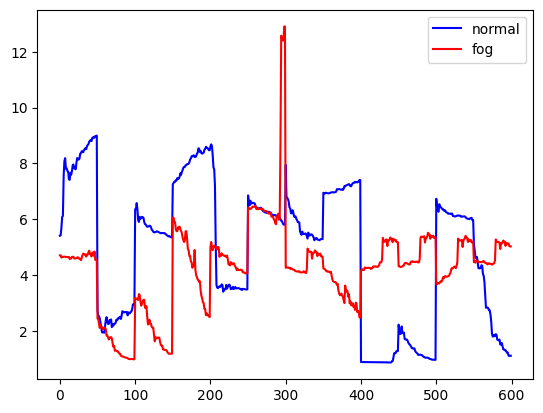

In [40]:
plt.plot([i for i in range(len(reconstruction_normal_list))], reconstruction_normal_list, color='blue', label='normal')
plt.plot([i for i in range(len(reconstruction_fog_list))], reconstruction_fog_list, color='red', label='fog')
plt.legend()
plt.show()

### 隨機生成的壓力點位

In [41]:
single_sample = np.random.rand(12, 20)/255

# 将样本转换为适当的形状 (1, 12, 20, 1)，添加通道维度
single_sample = single_sample.reshape(1, 12, 20, 1)

# 使用训练好的模型进行预测
decoded_single_sample = model.predict(single_sample)

 # 計算重建誤差
reconstruction_error_single_sample = np.mean(np.square(single_sample - decoded_single_sample))
print(f"Reconstruction Error for Single Sample: {reconstruction_error_single_sample * 1000}")

1/1 [==============================] - 0s 23ms/step
Reconstruction Error for Single Sample: 0.8403011624130946
